In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
for i in df.select_dtypes([float, int]).columns:
    if i == "DiabetesPedigreeFunction" and i == "Insulin" :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(2.5*IQR)
        ust_sinir = Q3+(2.5*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        
        
    elif  i == "BloodPressure" and i == "BMI" and i == "Age" :
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR = Q3-Q1
            alt_sinir = Q1-(1.8*IQR)
            ust_sinir = Q3+(1.8*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
            aykiri_alt = df[i] < alt_sinir
            aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
            df[i][aykiri_alt] = alt_sinir
            df[i][aykiri_ust] = ust_sinir
    
    else : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.7*IQR)
        ust_sinir = Q3+(1.7*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir

In [4]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [36]:
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("mlp", MLPClassifier(random_state = 42))]
Pipeline(steps=operations)
mlp_model = Pipeline(steps=operations)
mlp_model.fit(X_train, y_train)
eval_metric(mlp_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 15]
 [24 30]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154


Train_Set
[[363  37]
 [ 72 142]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       400
           1       0.79      0.66      0.72       214

    accuracy                           0.82       614
   macro avg       0.81      0.79      0.80       614
weighted avg       0.82      0.82      0.82       614



In [11]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

operations = [("scaler", StandardScaler()), ("mlp", MLPClassifier(random_state = 42))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.704
test_recall      0.630
test_f1          0.658
test_accuracy    0.775
dtype: float64

In [13]:
mlp_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('mlp', MLPClassifier(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'mlp': MLPClassifier(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__batch_size': 'auto',
 'mlp__beta_1': 0.9,
 'mlp__beta_2': 0.999,
 'mlp__early_stopping': False,
 'mlp__epsilon': 1e-08,
 'mlp__hidden_layer_sizes': (100,),
 'mlp__learning_rate': 'constant',
 'mlp__learning_rate_init': 0.001,
 'mlp__max_fun': 15000,
 'mlp__max_iter': 200,
 'mlp__momentum': 0.9,
 'mlp__n_iter_no_change': 10,
 'mlp__nesterovs_momentum': True,
 'mlp__power_t': 0.5,
 'mlp__random_state': 42,
 'mlp__shuffle': True,
 'mlp__solver': 'adam',
 'mlp__tol': 0.0001,
 'mlp__validation_fraction': 0.1,
 'mlp__verbose': False,
 'mlp__warm_start': False}

In [16]:
# hidden_layer_sizes : sinir ağı kat sayısı demektir. derinlik sayısıdır default değeri 100 dür.
# activation : {identity, logistic, tanh, relu} default değeri relu
# solver ={"lbfgs", "sgd", "adam"} default adam 
# alpha : default 0.001, l2 regulazisyon lasso kullanılır.
# learning_rate = {constant, invscaling, adaptive} default constant

In [19]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("mlp", MLPClassifier(random_state=42))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)

param_grid = {'mlp__alpha': np.linspace(0,2,100)}

grid_model = GridSearchCV(model, param_grid, scoring= "recall" , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(random_state=42))]),
             param_grid={'mlp__alpha': array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.3838...
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494949,
       1.51515152, 1.53535354, 1.55555556, 1.57575758, 1.5959596 ,
       1.61616162, 1.63636364, 1.65656566, 1.67676768, 1.6969697 ,
       1.71717172, 1.73737374, 1.75757576, 1.77777778, 1.7979798 ,
       1.81818182, 1.83838384, 1.85858586, 1.87878788, 1.8989899 ,
       1.91919192, 1.93939394, 1.95959596, 1.97979798, 2.        ])},
            

In [20]:
grid_model.best_params_

{'mlp__alpha': 0.12121212121212122}

In [23]:
operations = [("scaler", StandardScaler()), ("mlp", MLPClassifier(random_state=42, alpha=0.12121212121212122))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)

param_grid = {'mlp__hidden_layer_sizes': [(100,100,100,100),(100,100,100)]}

grid_model = GridSearchCV(model, param_grid, scoring= "recall" , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(alpha=0.12121212121212122,
                                                      random_state=42))]),
             param_grid={'mlp__hidden_layer_sizes': [(100, 100, 100, 100),
                                                     (100, 100, 100)]},
             scoring='recall')

In [24]:
grid_model.best_params_

{'mlp__hidden_layer_sizes': (100, 100, 100, 100)}

In [25]:
operations = [("scaler", StandardScaler()), ("mlp", MLPClassifier(random_state=42, alpha=0.1212,
                                                                 hidden_layer_sizes = (100, 100, 100, 100) ))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)

param_grid = {'mlp__solver': ["lbfgs","adam", "sgd"]}

grid_model = GridSearchCV(model, param_grid, scoring= "recall" , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(alpha=0.1212,
                                                      hidden_layer_sizes=(100,
                                                                          100,
                                                                          100,
                                                                          100),
                                                      random_state=42))]),
             param_grid={'mlp__solver': ['lbfgs', 'adam', 'sgd']},
             scoring='recall')

In [26]:
grid_model.best_params_

{'mlp__solver': 'adam'}

In [27]:
operations = [("scaler", StandardScaler()), ("mlp", MLPClassifier(random_state=42, alpha=0.1212,
                                                                 hidden_layer_sizes = (100, 100, 100, 100), solver= "adam"))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)

param_grid = {'mlp__activation': ["relu","logistic"]}

grid_model = GridSearchCV(model, param_grid, scoring= "recall" , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(alpha=0.1212,
                                                      hidden_layer_sizes=(100,
                                                                          100,
                                                                          100,
                                                                          100),
                                                      random_state=42))]),
             param_grid={'mlp__activation': ['relu', 'logistic']},
             scoring='recall')

In [28]:
grid_model.best_params_

{'mlp__activation': 'relu'}

In [29]:
operations = [("scaler", StandardScaler()), ("mlp", MLPClassifier(random_state=42, alpha=0.1212,
                                                                 hidden_layer_sizes = (100, 100, 100, 100) , solver= "adam",
                                                                 activation = "relu"))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)

param_grid = {'mlp__learning_rate': ["constant", "invscaling", "adaptive"]}

grid_model = GridSearchCV(model, param_grid, scoring= "recall" , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(alpha=0.1212,
                                                      hidden_layer_sizes=(100,
                                                                          100,
                                                                          100,
                                                                          100),
                                                      random_state=42))]),
             param_grid={'mlp__learning_rate': ['constant', 'invscaling',
                                                'adaptive']},
             scoring='recall')

In [30]:
grid_model.best_params_

{'mlp__learning_rate': 'constant'}

In [31]:
eval_metric(grid_model,X_train, y_train, X_test, y_test)

Test_Set
[[65 35]
 [14 40]]
              precision    recall  f1-score   support

           0       0.82      0.65      0.73       100
           1       0.53      0.74      0.62        54

    accuracy                           0.68       154
   macro avg       0.68      0.70      0.67       154
weighted avg       0.72      0.68      0.69       154


Train_Set
[[369  31]
 [  2 212]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       400
           1       0.87      0.99      0.93       214

    accuracy                           0.95       614
   macro avg       0.93      0.96      0.94       614
weighted avg       0.95      0.95      0.95       614



In [33]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

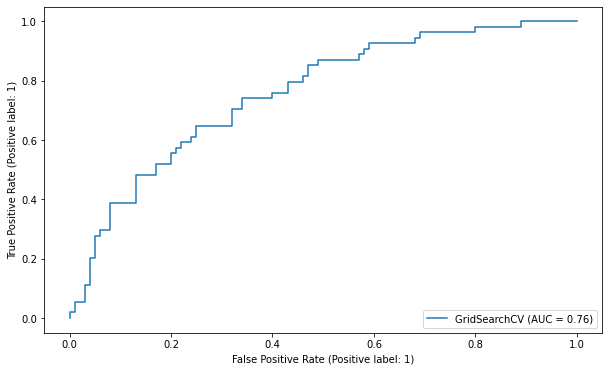

In [34]:
plot_roc_curve(grid_model, X_test, y_test, pos_label=1);

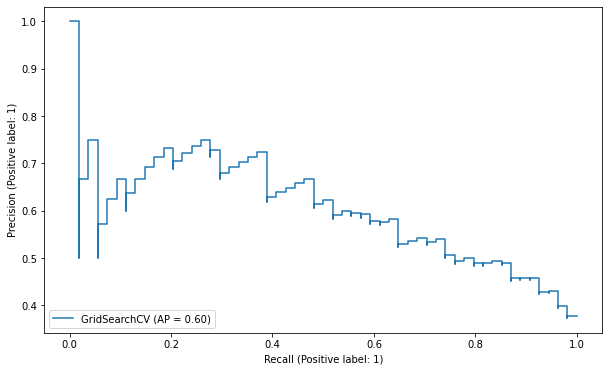

In [35]:
plot_precision_recall_curve(grid_model, X_test, y_test, pos_label=1);

In [37]:
y_pred_proba = mlp_model.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate) 

optimal_threshold = thresholds[optimal_idx] # en iyi threshold değerimizin olduğu indexi arraye vererek buluruz.
optimal_threshold

0.2606515297411563

In [43]:
y_pred = pd.Series(grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= 0.1 else 0)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49 51]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.88      0.49      0.63       100
           1       0.48      0.87      0.62        54

    accuracy                           0.62       154
   macro avg       0.68      0.68      0.62       154
weighted avg       0.74      0.62      0.62       154



In [41]:
y_pred1 = pd.Series(grid_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_train, y_pred1))
print(classification_report(y_train, y_pred1))

[[334  66]
 [  1 213]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       400
           1       0.76      1.00      0.86       214

    accuracy                           0.89       614
   macro avg       0.88      0.92      0.89       614
weighted avg       0.92      0.89      0.89       614



In [44]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    # for ile manuel olarak cross validation train ve test verilerini seçiyoruz.
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    # aldığımız her skoru yukarıda tanımlanan boş listeye atıyoruz. 
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%') 
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [45]:
grid_model.best_params_

{'mlp__learning_rate': 'constant'}

In [46]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [50]:
operations = [("scaler", StandardScaler()), ("mlp", MLPClassifier(random_state=42, alpha=0.1212,
                                                                 hidden_layer_sizes = (100, 100, 100, 100) , solver= "adam",
                                                                 activation = "relu", learning_rate = "constant"))]
Pipeline(steps=operations)
model = Pipeline(steps=operations)
model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(alpha=0.1212,
                               hidden_layer_sizes=(100, 100, 100, 100),
                               random_state=42))])

In [51]:
prediction = pd.Series(model.predict_proba(X)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y, prediction))
print(classification_report(y, prediction))

[[500   0]
 [  0 268]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [54]:
CV(10, model, pd.DataFrame(X_scale), y, optimal_threshold)

Accuracy      71.22%  std 5.05%
Precision-1   58.56%  std 7.71%
Recall-1      63.83%  std 9.85%
F1_score-1    60.60%  std 7.08%


In [57]:
CV(10, model, X, y, 0.01)

Accuracy      66.27%  std 5.53%
Precision-1   51.39%  std 5.62%
Recall-1      76.15%  std 10.66%
F1_score-1    61.08%  std 6.18%
